# PI7 - Onderzoeksopdracht (EDA)
##### Gemaakt door: Niema Mahmoudi (1807633) & Silas Dannullis (2100940)

## Inhoudsopgave

1. [**Introductie**](#1)
    - Project Beschrijving
    - Data Beschrijving
2. [**Inladen & Verzamelen van de Data**](#2)
	- Importeren van libraries
    - Laden van de data
    - Dataverkenning 
3. [**Data Preprocessing**](#3)
4. [**Data Analyse**](#4)
5. [**Conclusie**](#5)
    - Inzichten
    - Suggesties
    - Mogelijke volgende stappen
6. [**Epiloog**](#6) 
    - Referenties
    - Versiebeheer

---

# 1

## Introductie

*Insert Image Here (misschien een grafiek die een overzicht geeft van de belangrijkste aspecten van het dataset. Dit kan bijvoorbeeld een histogram, een scatterplot of een ander type visualisatie zijn dat direct wat inzicht geeft in de gegevens.)*

### Projectbeschrijving

**Doel:**

Het doel van dit project is om de Boston Housing dataset te analyseren om de factoren te begrijpen die van invloed zijn op de huizenprijzen in Boston. We zullen verschillende data-analysetechnieken toepassen, zoals multiple linear regression, logistic regression, decision trees, random forests, neural networks en support vector machines, om patronen en relaties binnen de data te identificeren en voorspellende modellen te ontwikkelen.

**Aanpak en Methodologie:**

Na het succesvol laden van de Boston Housing dataset, zal deze analyseerd worden en door middel van onderstaande pre-processing stappen opgeschoond worden: 

- Omgaan met ontbrekende data
- Omgaan met foute data
- Data normalisatie
- Categorische data encoderen
- Outlier detectie en verwijdering

### Beschrijving Data

**Inhoud:** 

Het dataset is een CSV-bestand met 506 datapunten die, onder andere informatie bevat over woningen in de regio Boston. De dataset omvat kenmerken zoals het criminaliteitscijfer, het aantal kamers, de leeftijd van de woning en de afstand tot werkcentra.
Er is gekozen voor de Boston Housing-dataset omdat deze aan onderstaande voorwaarden voldoet:

#### 1. Er zijn geschikte features voor classificatie en regressie
- **Classificatie**: De dataset kan worden aangepast voor classificatie door een binaire variabele te creëren, bijvoorbeeld door huizenprijzen boven een bepaalde drempel als 'duur' (1) en daaronder als 'goedkoop' (0) te classificeren.
- **Regressie**: De kolom `medv` (Median Value of owner-occupied homes) wordt gebruikt voor regressie om de huizenprijzen te voorspellen.

#### 2. Er zijn voldoende onafhankelijke features
Beschikbare features (zonder de labels):

- `crim` (per capita crime rate by town)
- `zn` (proportion of residential land zoned for lots over 25,000 sq. ft.)
- `indus` (proportion of non-retail business acres per town)
- `chas` (Charles River dummy variable: 1 if tract bounds river; 0 otherwise)
- `nox` (nitric oxides concentration (parts per 10 million))
- `rm` (average number of rooms per dwelling)
- `age` (proportion of owner-occupied units built prior to 1940)
- `dis` (weighted distances to five Boston employment centres)
- `rad` (index of accessibility to radial highways)
- `tax` (full-value property tax rate per $10,000)
- `ptratio` (pupil-teacher ratio by town)
- `b` (1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town)
- `lstat` (percentage of lower status of the population)

#### 3. De dataset bevat voldoende records

De dataset bevat informatie over 506 woningen, wat ruim voldoende is voor onze vereisten (minimaal 50 records + 10% voor de test set).

#### 4. De dataset bevat verschillende typen data

De dataset bevat onderstaande typen data:
- **Categorisch**: `chas` 
- **Numeriek**: `crim`, `zn`, `indus`, `nox`, `rm`, `age`, `dis`, `rad`, `tax`, `ptratio`, `b`, `lstat`

<p>&nbsp;</p>

**Credit:** 

Deze dataset is opgehaald van *kaggle*. De bron kan gevonden worden op [deze website](https://www.kaggle.com/datasets/altavish/boston-housing-dataset).

---

# 2

## Inladen & Verzamelen van de Data

### Importeren van libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### Laden van de data

In [3]:
#dataset laden
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

### Dimensies van de dataset

In [4]:
# laat dimensies van de dataset zien
# print(np.shape(df))
print(np.shape(df))

(506, 14)


### Datatype inzien

In [5]:
# laat datatypes zien
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


De dataset bevat de onderstaande datatypes:
- De kolommen `crim`, `zn`, `indus`, `nox`, `rm`, `age`, `dis`, `ptratio`, `b`, `lstat` en `medv` bevatten **floats**.
- De kolommen `chas`, `rad` en `tax` bevatten **integers**.



### Dataverkenning

In [6]:
# 1. data inspectie
#df = df.sample(n=500, random_state=42)
print("Kolommen in de dataset:", df.columns)
print("\nVoorbeeldweergave van de eerste rijen:\n", df.head())
print("\nVoorbeeldweergave van de laatste rijen:\n", df.tail())
print("\nControle op ontbrekende waarden:\n", df.isnull().sum())

Kolommen in de dataset: Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

Voorbeeldweergave van de eerste rijen:
       crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Voorbeeldweergave van de laatste rijen:
         crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93     0  0.573  

#### Controleren op ontbrekende data

In [7]:
# # Print percentage van missende gegevens
missing_percent = df.isna().mean().sort_values(ascending=False)
print('---- Percentage missende gegevens (%) -----')
if missing_percent.sum():
   print(missing_percent[missing_percent > 0] * 100)
else:
   print('Geen missende gegevens gevonden')

---- Percentage missende gegevens (%) -----
Geen missende gegevens gevonden


#### Controleren op dubbele rijen

In [8]:
# # Print aantal duplicaten
print(f"Aantal duplicate rijen: {df.duplicated().sum()}")

# # Laat duplicate rijen zien
df[df.duplicated()]

Aantal duplicate rijen: 0


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


#### Databereik controleren

In [9]:
## samenvatting van de dataset
df.describe(include='all')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In de `medv` kolom is te zien dat de maximale waarde 50.0 bedraagt. Dit betekent dat er een limiet is ingesteld op de waarde van de huisprijzen in de dataset. Huizen met een prijs boven het limiet worden als $50.000 geregistreerd. 

---

# 3

## Data Preprocessing

Voor de preprocessing van de data zijn de volgende stappen gevolgd:

- Omgaan met ontbrekende data (deze stap is niet relevant gezien er geen ontbrekende data is.)
- Omgaan met foute data
- Data normalisatie
- Categorische data encoderen (In het dataset zijn er geen categorische variabelen die moeten worden omgezet)
- Outlier detectie en verwijdering (Uitschieters worden gedetecteerd en verwijderd met behulp van de Z-score methode om de kwaliteit van de data verder te verbeteren.)

#### Omgaan met foute data

In [10]:
# 1. Omgaan met foute data 
numerical_features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
for col in numerical_features:
    df = df[df[col] >= 0]

#### Normalisatie / Schalen van data

Numerieke variabelen worden genormaliseerd met behulp van `StandardScaler` om ze binnen een vergelijkbaar bereik te brengen, dit is belangrijk voor algoritmen die gevoelig zijn voor de grootte van de data. 
`StandardScaler` normaliseert data door het gemiddelde van de features te verwijderen en deze zodanig te scalen dat de standaarddeviatie `σ` = 1. Dit wordt gedaan door de standaardscore (z) van een sample (x) te berekenen met onderstaande formule:
$$
z = \frac{x - μ}σ
$$

In [11]:
# 2. Data normalisatie  
scaler = StandardScaler() 
df[numerical_features] = scaler.fit_transform(df[numerical_features])

#### Detecteren en verwijderen van uitschieters

Uitschieters worden gedetecteerd en verwijderd met behulp van de Z-score methode om de kwaliteit van de data verder te verbeteren. De z-score, ook wel gestandaardiseerde score genoemd, is een statistische maat die aangeeft hoeveel standaarddeviaties een waarde van het gemiddelde afwijkt. Het is een manier om te bepalen waar een specifieke waarde zich bevindt in een verdeling. 

In [12]:
# 3. Outlier detectie en vewijdering 
df = df[(np.abs(stats.zscore(df[numerical_features])) < 3).all(axis=1)] 

print("Opgemaakte dataset:\n", df.head()) 

Opgemaakte dataset:
        crim        zn     indus  chas       nox        rm       age       dis  \
0 -0.419782  0.284830 -1.287909     0 -0.144217  0.413672 -0.120013  0.140214   
1 -0.417339 -0.487722 -0.593381     0 -0.740262  0.194274  0.367166  0.557160   
2 -0.417342 -0.487722 -0.593381     0 -0.740262  1.282714 -0.265812  0.557160   
3 -0.416750 -0.487722 -1.306878     0 -0.835284  1.016303 -0.809889  1.077737   
4 -0.412482 -0.487722 -1.306878     0 -0.835284  1.228577 -0.511180  1.077737   

        rad       tax   ptratio         b     lstat      medv  
0 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


#### Opslaan van de geprocessed data in een lokaal CSV-bestand

In [13]:
df.to_csv('preprocessed_boston_housing.csv', index=False)

---

# 4
## Data Analyse

Hieronder volgen een aantal visualisaties van de data, waaronder een correlation matrix en een scatterplot die de relatie tussen de RM en MEDV kolom weergeeft.

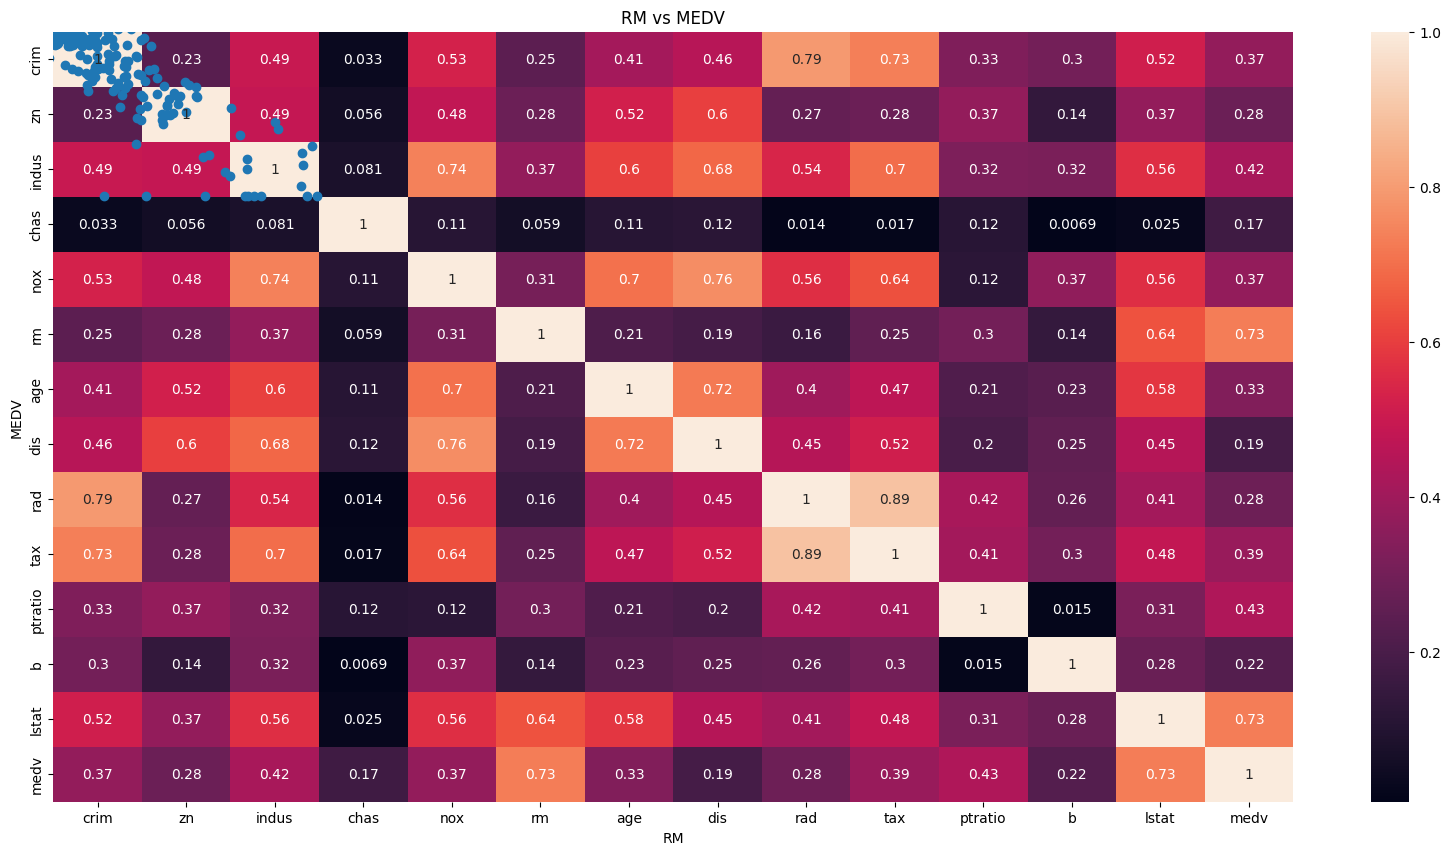

In [14]:
# correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

# scatter plot
plt.scatter(df['rm'], df['medv'])
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('RM vs MEDV')
plt.show()

---

# 5
## Epiloog


### Referenties

Citatie maken[<sup id="fn1-back">[1]</sup>](#fn1).

[<span id="fn1">1.</span>](#fn1-back) _Chua, Chris (22-03-2023)._ eda-starter. Opgehaald van github: https://github.com/chuawt/eda-starter/ (Geraadpleegd op: 10-06-2024). 

### Versiebeheer
Notebook gemaakt door Niema en Silas.
- Version: 1.0.0
- Date: 10-06-2024